In [14]:
import pandas as pd
from joblib import dump, load
from sklearn.metrics import classification_report, plot_roc_curve

model = load('LogisticRegressionSynthChurnData.joblib')
df = pd.read_csv('SynthDataChurnQ2.csv')
df = pd.get_dummies(data = df, columns = ['size','industry'], drop_first=True)
base = df[['Tenure','size_Small','industry_Manufacturing','industry_Military', 'industry_Other','industry_PublicSector']]

In [9]:
prediction = model.predict(base)
predicted_proba = model.predict_proba(base)[:,1]
out = df.copy()
out['Prediction'] = prediction
out['Predicted_proba'] = predicted_proba
out

,Dates,AccountID,Churn,accounts,startdate,tenure,enddate,Tenure,size_Small,industry_Manufacturing,industry_Military,industry_Other,industry_PublicSector,Prediction,Predicted_proba
0,2021-04-01 00:00:00,46147,Active,46147,2020-12-16 15:03:48,195,2021-06-29 15:03:48,105,1,1,0,0,0,Active,0.296569
1,2021-04-01 00:00:00,52694,Active,52694,2020-07-25 08:05:56,308,2021-05-29 08:05:56,249,1,0,0,0,1,Churn,0.573069
2,2021-04-01 00:00:00,1206,Active,1206,2020-07-19 11:05:17,382,2021-08-05 11:05:17,255,0,1,0,0,0,Active,0.419610
3,2021-04-01 00:00:00,89471,Active,89471,2021-02-27 12:24:01,252,2021-11-06 12:24:01,32,1,1,0,0,0,Active,0.171949
4,2021-04-01 00:00:00,51803,Active,51803,2020-04-21 16:19:17,402,2021-05-28 16:19:17,344,1,0,0,0,1,Churn,0.771358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21914,2021-07-01 00:00:00,27887,Active,27887,2020-11-04 16:48:43,281,2021-08-12 16:48:43,238,1,1,0,0,0,Churn,0.605054
21915,2021-07-01 00:00:00,5092,Active,5092,2020-06-28 10:01:40,421,2021-08-23 10:01:40,367,1,1,0,0,0,Churn,0.842642
21916,2021-07-01 00:00:00,30558,Active,30558,2020-06-11 13:25:24,438,2021-08-23 13:25:24,384,0,1,0,0,0,Churn,0.716483
21917,2021-07-01 00:00:00,48868,Active,48868,2021-06-27 03:52:00,583,2023-01-31 03:52:00,3,0,0,0,0,1,Active,0.047067



Bad key "text.kerning_factor" on line 4 in
/Users/fabrizio/anaconda3/envs/DATA/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


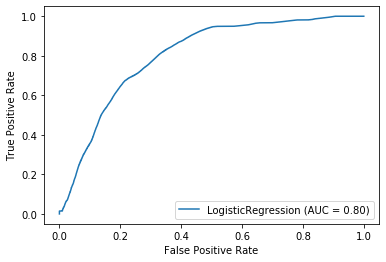

In [15]:
plot_roc_curve(model, base, df['Churn']) 

In [12]:
print(classification_report(df['Churn'], prediction))

              precision    recall  f1-score   support

      Active       0.97      0.70      0.81     19845
       Churn       0.21      0.77      0.33      2074

    accuracy                           0.71     21919
   macro avg       0.59      0.73      0.57     21919
weighted avg       0.89      0.71      0.77     21919

